# Boosting with XGBoost

XGBoost, or eXtreme Gradient Boosting, is a machine learning algorithm under ensemble learning. It is trendy for supervised learning tasks, such as regression and classification. XGBoost builds a predictive model by combining the predictions of multiple individual models, often decision trees, in an iterative manner.


    Why Ensemble Learning?
`XGBoost` is an ensemble learning method. Sometimes, it may not be sufficient to rely upon the results of just one machine learning model. Ensemble learning offers a systematic solution to combine the predictive power of multiple learners. The resultant is a single model which gives the aggregated output from several models.

The models that form the ensemble, also known as base learners, could be either from the same learning algorithm or different learning algorithms. Bagging and boosting are two widely used ensemble learners. Though these two techniques can be used with several statistical models, the most predominant usage has been with decision trees.

Let’s briefly discuss bagging before taking a more detailed look at the concept of gradient boosting.

`1. Bagging`
While decision trees are one of the most easily interpretable models, they exhibit highly variable behavior. Consider a single training dataset that we randomly split into two parts. Now, let’s use each part to train a decision tree in order to obtain two models.

When we fit both these models, they would yield different results. Decision trees are said to be associated with high variance due to this behavior. Bagging or boosting aggregation helps to reduce the variance in any learner. Several decision trees which are generated in parallel, form the base learners of bagging technique. Data sampled with replacement is fed to these learners for training. The final prediction is the averaged output from all the learners.

`2. Boosting`
In boosting, the trees are built sequentially such that each subsequent tree aims to reduce the errors of the previous tree. Each tree learns from its predecessors and updates the residual errors. Hence, the tree that grows next in the sequence will learn from an updated version of the residuals.

The base learners in boosting are weak learners in which the bias is high, and the predictive power is just a tad better than random guessing. Each of these weak learners contributes some vital information for prediction, enabling the boosting technique to produce a strong learner by effectively combining these weak learners. The final strong learner brings down both the bias and the variance.

In contrast to bagging techniques like Random Forest, in which trees are grown to their maximum extent, boosting makes use of trees with fewer splits. Such small trees, which are not very deep, are highly interpretable. Parameters like the number of trees or iterations, the rate at which the gradient boosting learns, and the depth of the tree, could be optimally selected through validation techniques like k-fold cross validation. Having a large number of trees might lead to overfitting. So, it is necessary to carefully choose the stopping criteria for boosting.

The gradient boosting ensemble technique consists of three simple steps:

1. An initial model F0 is defined to predict the target variable y. This model will be associated with a residual (y – F0)
2. A new model h1 is fit to the residuals from the previous step
3. Now, F0 and h1 are combined to give F1, the boosted version of F0. The mean squared error from F1 will be lower than that from F0:

    ![equation](https://latex.codecogs.com/png.latex?F_1%20%3D%20F_0%20&plus;%20h_1)

    To improve the performance of F1, we could model after the residuals of F1 and create a new model F2:

    ![equation](https://latex.codecogs.com/png.latex?F_2%20%3D%20F_1%20&plus;%20h_2)

    This can be done for ‘m’ iterations, until residuals have been minimized as much as possible:

    ![equation](https://latex.codecogs.com/png.latex?F_m%20%3D%20F_%7Bm-1%7D%20&plus;%20h_m)

    Here, the additive learners do not disturb the functions created in the previous steps. Instead, they impart information of their own to bring down the errors.


`Model Evaluation in XGBoost` 

The evaluation of the model is a crucial step in the process of model building. It helps to understand the performance of the model and to fine-tune the parameters. The evaluation of the model can be done using various techniques. The most common methods are:
Here, we will see the model evaluation process with the process of Cross-validation. So, what is cross-validation?

Cross-validation
Cross-validation is a robust method for estimating the performance of model on unseen data by generating many non-overlapping train/test splits into training data and reporting the average test set performance across all data splits.



In [26]:
#import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier



In [34]:
# import the data
df = sns.load_dataset('diamonds')
df.shape

(53940, 10)

In [35]:
# split the data into X and y
X = df.drop('cut', axis=1)
y = df['cut']

# encode the input variables
le = LabelEncoder()
X['color'] = le.fit_transform(X['color'])
X['clarity'] = le.fit_transform(X['clarity'])

# encode the target variable
y = le.fit_transform(y)

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [36]:
%%time
# train the decision tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# predict the test data
y_pred = dt.predict(X_test)

print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred, average='micro'))
print('Recall score: ', recall_score(y_test, y_pred, average='micro'))
print('F1 score: ', f1_score(y_test, y_pred, average='micro'))

Accuracy score:  0.7090285502410085
Precision score:  0.7090285502410085
Recall score:  0.7090285502410085
F1 score:  0.7090285502410085
CPU times: total: 266 ms
Wall time: 889 ms


In [37]:
%%time
# train the random forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# predict the test data
y_pred = rf.predict(X_test)

print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred, average='micro'))
print('Recall score: ', recall_score(y_test, y_pred, average='micro'))
print('F1 score: ', f1_score(y_test, y_pred, average='micro'))

Accuracy score:  0.7802187615869485
Precision score:  0.7802187615869485
Recall score:  0.7802187615869485
F1 score:  0.7802187615869485
CPU times: total: 5.03 s
Wall time: 17.6 s


In [38]:
%%time
# train the xgboost model
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# predict the test data
y_pred = xgb.predict(X_test)

print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred, average='micro'))
print('Recall score: ', recall_score(y_test, y_pred, average='micro'))
print('F1 score: ', f1_score(y_test, y_pred, average='micro'))

Accuracy score:  0.796347793845013
Precision score:  0.796347793845013
Recall score:  0.796347793845013
F1 score:  0.796347793845013
CPU times: total: 8.23 s
Wall time: 2.3 s


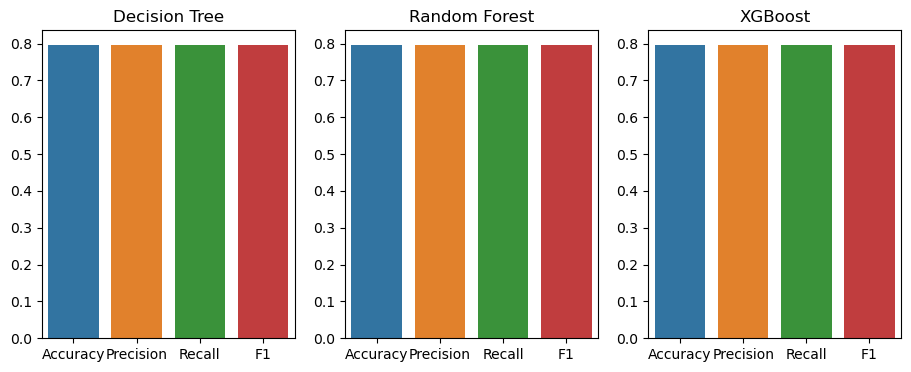

In [39]:
# make a bar plot showing each of the matrix with respect to the model
plt.figure(figsize=(15, 4))
plt.subplot(1, 4, 1)
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1'], y=[accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='micro'), recall_score(y_test, y_pred, average='micro'), f1_score(y_test, y_pred, average='micro')])
plt.title('Decision Tree')
plt.subplot(1, 4, 2)
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1'], y=[accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='micro'), recall_score(y_test, y_pred, average='micro'), f1_score(y_test, y_pred, average='micro')])
plt.title('Random Forest')
plt.subplot(1, 4, 3)
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1'], y=[accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='micro'), recall_score(y_test, y_pred, average='micro'), f1_score(y_test, y_pred, average='micro')])
plt.title('XGBoost')
# plt.tight_layout()
plt.show()